In [340]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [341]:
df = pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [342]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [343]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [344]:
df.fillna({'Age': df['Age'].median(), 'Embarked': 'S'}, inplace=True)
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [345]:
df.fillna({'Cabin': 'Unknown'}, inplace=True)
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [346]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [347]:
df.duplicated().sum()

np.int64(0)

<Axes: xlabel='Survived', ylabel='count'>

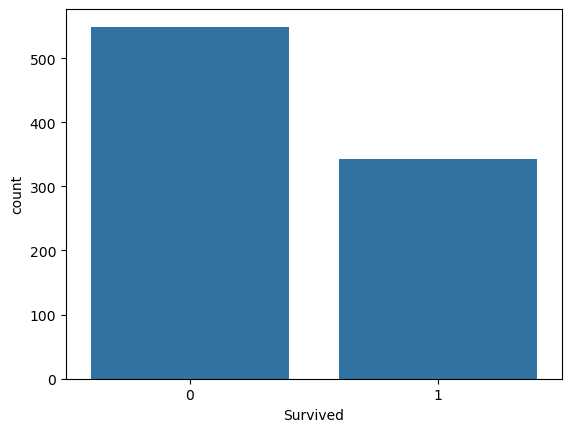

In [348]:
sns.countplot(x='Survived', data=df)

In [349]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

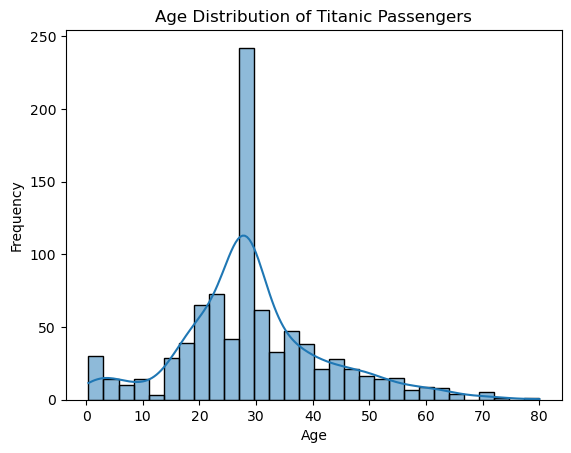

In [350]:
sns.histplot(data=df, x='Age', kde=True)
plt.title('Age Distribution of Titanic Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

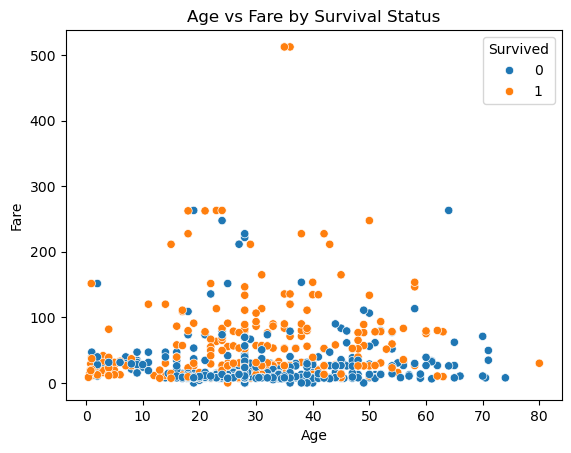

In [351]:
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df)
plt.title('Age vs Fare by Survival Status')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

<Axes: xlabel='Age', ylabel='Survived'>

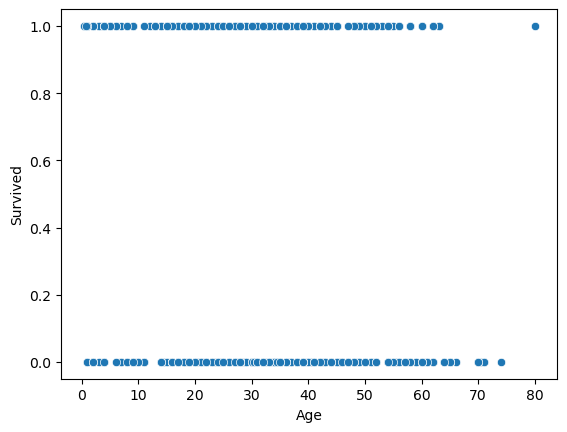

In [352]:
sns.scatterplot(x='Age', y='Survived',data=df)

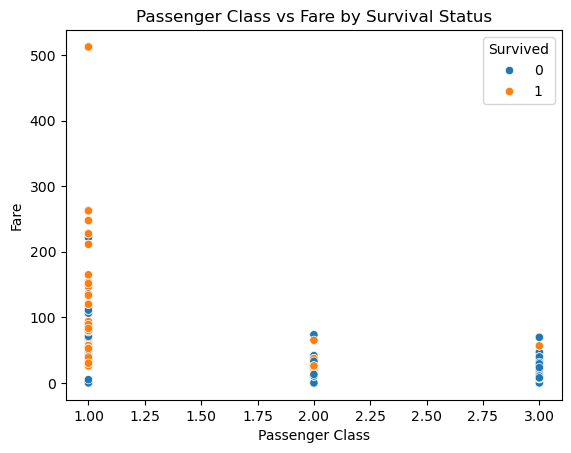

In [353]:
sns.scatterplot(x='Pclass', y='Fare', hue='Survived', data=df)
plt.title('Passenger Class vs Fare by Survival Status')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.show()

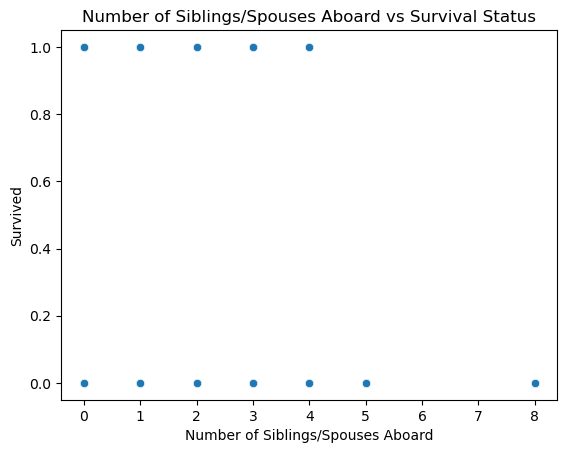

In [354]:
sns.scatterplot(x='SibSp', y='Survived', data=df)
plt.title('Number of Siblings/Spouses Aboard vs Survival Status')
plt.xlabel('Number of Siblings/Spouses Aboard')
plt.ylabel('Survived')
plt.show()

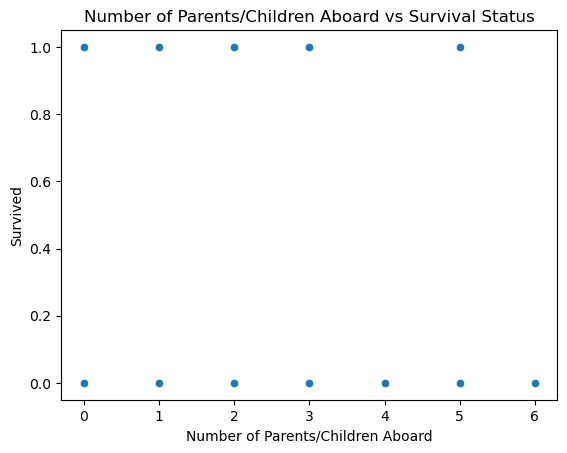

In [355]:
sns.scatterplot(x='Parch', y='Survived', data=df)
plt.title('Number of Parents/Children Aboard vs Survival Status')
plt.xlabel('Number of Parents/Children Aboard')
plt.ylabel('Survived')
plt.show()

<Axes: xlabel='Cabin', ylabel='Survived'>

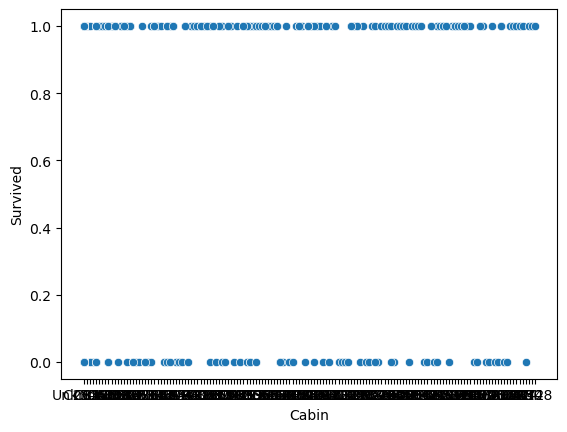

In [356]:
sns.scatterplot(x='Cabin', y='Survived', data=df)

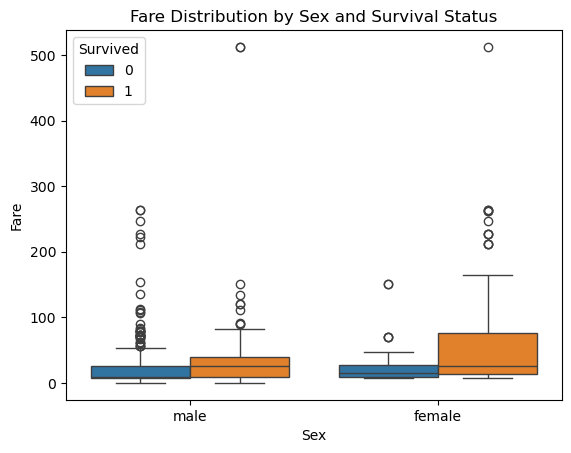

In [357]:
sns.boxplot(data=df, x='Sex', y='Fare', hue='Survived')
plt.title('Fare Distribution by Sex and Survival Status')
plt.show()

In [358]:
df.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [359]:
categorial_cols = []
numeric_cols = []
for col in df.columns:
    if df[col].dtype == 'object':
        categorial_cols.append(col)
    else:
        numeric_cols.append(col)
print("Categorial Columns:", categorial_cols)
print("Numeric Columns:", numeric_cols)

Categorial Columns: ['Sex', 'Embarked']
Numeric Columns: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


<Axes: >

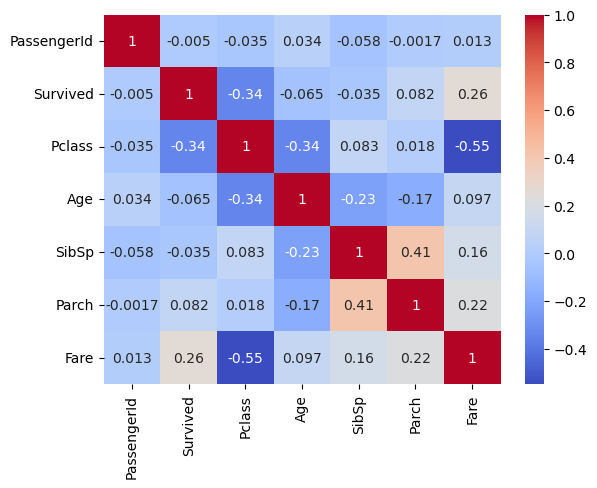

In [360]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')

In [361]:

from scipy.stats import chi2_contingency
from scipy.stats import entropy

results = []

n_rows = len(df)

for col in categorial_cols:
    series = df[col]

    # 1. Cardinality
    unique_vals = series.nunique(dropna=True)
    cardinality_ratio = unique_vals / n_rows

    # 2. Missing values
    missing_ratio = series.isna().mean()

    # 3. Entropy (information content)
    value_probs = series.fillna("MISSING").value_counts(normalize=True)
    ent = entropy(value_probs)

    # 4. Chi-square test (association with target)
    try:
        contingency = pd.crosstab(series.fillna("MISSING"), df["Survived"])
        chi2, p_value, _, _ = chi2_contingency(contingency)
    except:
        p_value = 1.0

    # 5. Decision logic
    if cardinality_ratio > 0.30:
        decision = "DROP"
        reason = "High cardinality (identifier-like)"
    elif p_value > 0.05:
        decision = "DROP"
        reason = "No statistically significant relationship with target"
    elif missing_ratio > 0.50:
        decision = "ENGINEER"
        reason = "Too many missing values"
    elif ent < 0.30:
        decision = "DROP"
        reason = "Low information (near-constant feature)"
    else:
        decision = "KEEP"
        reason = "Informative and associated with target"

    results.append({
        "column": col,
        "unique_values": unique_vals,
        "cardinality_ratio": round(cardinality_ratio, 3),
        "missing_ratio": round(missing_ratio, 3),
        "entropy": round(ent, 3),
        "chi2_p_value": round(p_value, 6),
        "decision": decision,
        "reason": reason
    })

analysis_df = pd.DataFrame(results).sort_values("decision")
print(analysis_df)


     column  unique_values  ...  decision                                  reason
0       Sex              2  ...      KEEP  Informative and associated with target
1  Embarked              3  ...      KEEP  Informative and associated with target

[2 rows x 8 columns]


In [362]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in categorial_cols:
    df[col] = le.fit_transform(df[col])



In [363]:
X = df.drop(['Survived','PassengerId'],axis=1)
Y = df['Survived']
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,2
887,1,0,19.0,0,0,30.0000,2
888,3,0,28.0,1,2,23.4500,2
889,1,1,26.0,0,0,30.0000,0


In [364]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [365]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X, Y)


c:\Users\sayan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [366]:
# y_pred = model.predict(X_test)


In [367]:
# from sklearn.metrics import accuracy_score
# accuracy = accuracy_score(Y_test, y_pred)
# accuracy

In [368]:
# print(set(y_pred))        # must be {0, 1}
# print(len(Y_test))        # must match predictions
# print(Y_test.mean())      # baseline survival rate (~0.38)


In [380]:
df_test = pd.read_csv("test.csv")
passenger_ids = df_test["PassengerId"]

df_test


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [370]:
df_test.isna().sum()


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [371]:
df_test.fillna({'Age': df_test['Age'].median(), 'Fare': df_test['Fare'].median()}, inplace=True)
df_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [372]:
df_test.fillna({'Cabin': 'Unknown'}, inplace=True)
df_test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [373]:
df_test.drop(['Name', 'Ticket', 'Cabin','PassengerId'], axis=1, inplace=True)

In [374]:
categorial_cols_test = []
for col in df_test.columns:
    if df_test[col].dtype == 'object':
        categorial_cols_test.append(col)

categorial_cols_test

['Sex', 'Embarked']

In [376]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in categorial_cols_test:
    df_test[col] = le.fit_transform(df_test[col])

In [378]:
y_pred = model.predict(df_test)
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
from sklearn.matrics import accuracy_score
accuracy = accuracy_score(, y_pred)
accuracy

In [381]:
submission = pd.DataFrame({
    "PassengerId": passenger_ids,
    "Survived": y_pred
})


In [382]:
submission.head()
submission.shape


(418, 2)

In [383]:
submission.to_csv("submission.csv", index=False)
